In [1]:
df_raw = pd.read_csv('../train.csv')

In [2]:
df11 = pd.read_csv('test_int.csv') 
df11.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,7,1710,2,548,856,856,2,8,2003,2003,208500
1,6,1262,2,460,1262,1262,2,6,1976,1976,181500
2,7,1786,2,608,920,920,2,6,2001,2002,223500
3,7,1717,3,642,756,961,1,7,1915,1970,140000
4,8,2198,3,836,1145,1145,2,9,2000,2000,250000


In [3]:
df22 = pd.read_csv('test_str.csv')
df22.head()

,NeighborhoodGrade,ExterQualGrade,KitchenQualGrade,BsmtQualGrade,SalePrice
0,17,3,3,3.0,208500
1,20,2,2,3.0,181500
2,17,3,3,3.0,223500
3,19,2,3,2.0,140000
4,24,3,3,3.0,250000


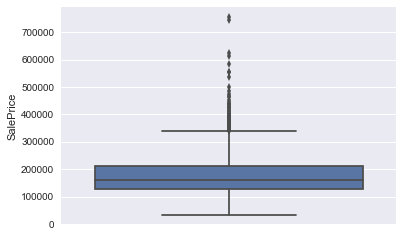

In [4]:
%matplotlib inline

sns.boxplot(y="SalePrice", data=df_raw) ## SalePrice의 데이터 분포 시각화2
plt.show()

# SalePrice(y값)의 아웃라이어 제거

In [5]:
import matplotlib.pyplot as plt
def IQEcheck(col):            ## IQE를 계산 및 box플롯의 정보
    q1 =col.quantile(q=0.25)
    q3 =col.quantile(q=0.75)
    iqr = q3 -q1
    upper = q3 + 1.5*iqr      ## upper 이상은 outlier
    lower = q1 - 1.5*iqr    
    print('median : ',col.median())   
    print('Q1 :',q1)    
    print('Q3 :',q3)
    print('upper :',upper)
    print('lower :',lower)

IQEcheck(df_raw['SalePrice'])  ##upper의 값이 필요했다.

median :  163000.0
Q1 : 129975.0
Q3 : 214000.0
upper : 340037.5
lower : 3937.5


In [6]:
len(df_raw)

1460

In [7]:
outlier_ls=[]
for idx in range(len(df_raw)):
    if df_raw['SalePrice'][idx] > 340037.5 :
        outlier_ls.append(idx)
len(outlier_ls)            ## 1460개중 61개는 y값 중 아웃라이어였다.

61

In [8]:
df22.iloc[2,:]

NeighborhoodGrade        17.0
ExterQualGrade            3.0
KitchenQualGrade          3.0
BsmtQualGrade             3.0
SalePrice            223500.0
Name: 2, dtype: float64

In [9]:
df_deloutlier = df_raw.drop(outlier_ls)

In [10]:
df_deloutlier.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
df_deloutlier.to_csv('new_train.csv', index = False) ##아웃라이어를 제거한 train파일 생성

# OverallQual의 아웃라이어제거

In [12]:
IQEcheck(df_raw['OverallQual'])

median :  6.0
Q1 : 5.0
Q3 : 7.0
upper : 10.0
lower : 2.0


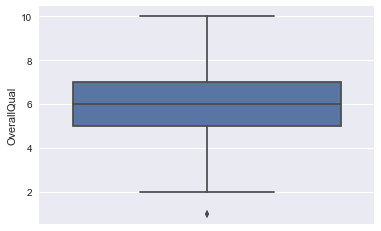

In [13]:
sns.boxplot(y="OverallQual", data=df_raw) ## SalePrice의 데이터 분포 시각화2
plt.show()

In [14]:
outlier_ls1=[]
for idx in range(len(df_raw)):
    if df_raw['OverallQual'][idx] < 2 :
        outlier_ls1.append(idx)
len(outlier_ls1)            ## 1460개중 2개는 OverallQual값 중 아웃라이어였다.

2

In [15]:
df_deloutlier1 = df_raw.drop(outlier_ls)

# GrLivArea의 아웃라이어 제거

In [16]:
IQEcheck(df_raw['GrLivArea'])

median :  1464.0
Q1 : 1129.5
Q3 : 1776.75
upper : 2747.625
lower : 158.625


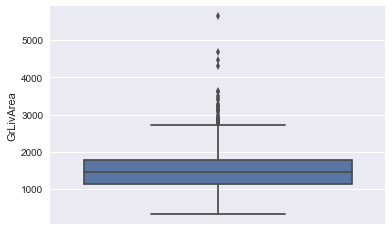

In [17]:
sns.boxplot(y="GrLivArea", data=df_raw) ## SalePrice의 데이터 분포 시각화2
plt.show()

In [18]:
outlier_ls2=[]
for idx in range(len(df_raw)):
    if df_raw['GrLivArea'][idx] > 2747.625 :
        outlier_ls2.append(idx)
len(outlier_ls2)            ## 1460개중 31개는 OverallQual값 중 아웃라이어였다.

31

# GarageCars의 아웃라이어 제거

In [19]:
IQEcheck(df_raw['GarageCars'])

median :  2.0
Q1 : 1.0
Q3 : 2.0
upper : 3.5
lower : -0.5


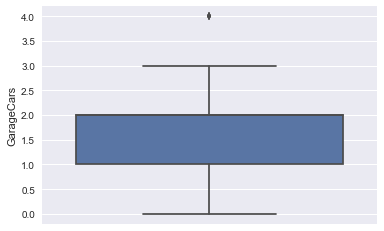

In [20]:
sns.boxplot(y="GarageCars", data=df_raw) ## SalePrice의 데이터 분포 시각화2
plt.show()

In [21]:
outlier_ls3=[]
for idx in range(len(df_raw)):
    if df_raw['GarageCars'][idx] > 3.5 :
        outlier_ls3.append(idx)
len(outlier_ls3)            ## 1460개중 5개는 OverallQual값 중 아웃라이어였다.

5

# GarageArea의 아웃라이어 제거

In [22]:
IQEcheck(df_raw['GarageArea'])

median :  480.0
Q1 : 334.5
Q3 : 576.0
upper : 938.25
lower : -27.75


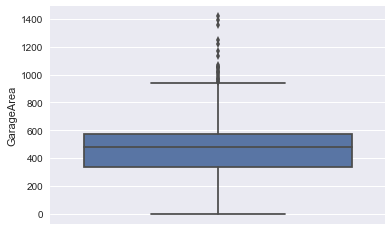

In [23]:
sns.boxplot(y="GarageArea", data=df_raw) ## SalePrice의 데이터 분포 시각화2
plt.show()

In [24]:
outlier_ls4=[]
for idx in range(len(df_raw)):
    if df_raw['GarageArea'][idx] > 938.25 :
        outlier_ls4.append(idx)
len(outlier_ls4)            ## 1460개중 5개는 OverallQual값 중 아웃라이어였다.

21

In [25]:
print(outlier_ls1)
print(outlier_ls2)
print(outlier_ls3)
print(outlier_ls4)

[375, 533]
[58, 118, 185, 197, 231, 304, 324, 496, 523, 583, 608, 635, 691, 769, 798, 803, 961, 1024, 1031, 1046, 1142, 1169, 1173, 1175, 1182, 1268, 1298, 1312, 1328, 1353, 1386]
[420, 747, 1190, 1340, 1350]
[178, 224, 270, 317, 408, 581, 664, 718, 803, 825, 1061, 1087, 1142, 1184, 1190, 1228, 1241, 1268, 1298, 1350, 1417]


# 가장 영향있는 4개 컬럼들의 각 아웃라이어 제거

# 1407의 row가 남음

In [26]:
df_test = df_raw.drop(outlier_ls1 + outlier_ls2 + outlier_ls3 + outlier_ls4)
len(df_test)

1407

In [27]:
df_test.to_csv('DO1234_train.csv', index = False) ##아웃라이어를 제거한 train파일 생성